In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [7]:
class Perceptron:
    
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_function = self._unit_step_func
        self.weights = None
        self.bias = None
        
    def _unit_step_func(self, x):
        return np.where(x>0, 1, 0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # init the weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        y_ = np.array([1 if i>0 else 0 for i in y])
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update 
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted


In [9]:
clf = Perceptron(learning_rate=0.001, n_iters = 1000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = np.mean(predictions==y_test)
print(f'Accuracy of the model is {accuracy*100} %.')

Accuracy of the model is 100.0 %.


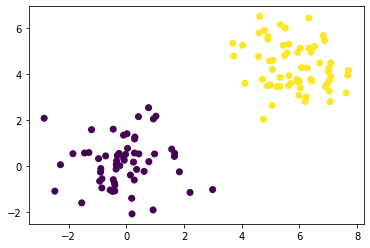

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)
x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-clf.weights[0] * x0_1 -clf.bias) / clf.weights[1]
x1_2 = (-clf.weights[0] * x0_2 -clf.bias) / clf.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')
ymin = np.amin(X_train[:,1])
ymin = np.amin(X_train[:,1])